In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
#from sklearn import linear_model 

# Imports necesarios 


#from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 
#plt.rcParams['figure.figsize'] = (16, 9)
#plt.style.use('ggplot')
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, make_scorer, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm

from sklearn.cluster import KMeans


C:\Users\ARRA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
kobi = pd.read_csv('kobidata.csv')

In [3]:
kobi.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [5]:

kobi = kobi.drop(['lat','lon', 'matchup', 'game_id','team_id','game_event_id','team_name','game_date'],axis=1)


In [4]:
kobi=kobi.dropna()

In [6]:
kobi.isna().sum()

action_type           0
combined_shot_type    0
loc_x                 0
loc_y                 0
minutes_remaining     0
period                0
playoffs              0
season                0
seconds_remaining     0
shot_distance         0
shot_made_flag        0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
opponent              0
shot_id               0
dtype: int64

In [7]:
X=kobi[['action_type', 'combined_shot_type', 'loc_x', 'loc_y',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance',  'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent',
       'shot_id']]

Y=kobi['shot_made_flag']

In [8]:
for feature in ['action_type', 'combined_shot_type','season',"shot_type",
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent']:
    le=preprocessing.LabelEncoder()
    le.fit(X[feature])
    X[feature]=X.apply(lambda row: le.transform([row[feature]])[0], axis=1)

X

C:\Users\ARRA\AppData\Local\Temp\ipykernel_3564\948989657.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature]=X.apply(lambda row: le.transform([row[feature]])[0], axis=1)
C:\Users\ARRA\AppData\Local\Temp\ipykernel_3564\948989657.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature]=X.apply(lambda row: le.transform([row[feature]])[0], axis=1)
C:\Users\ARRA\AppData\Local\Temp\ipykernel_3564\948989657.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id
1,25,3,-157,0,10,1,0,4,22,15,0,3,4,2,25,2
2,25,3,-101,135,7,1,0,4,45,16,0,2,4,0,25,3
3,25,3,138,175,6,1,0,4,52,22,0,4,4,0,25,4
4,4,1,0,0,6,2,0,4,19,0,0,1,5,4,25,5
5,25,3,-145,-11,9,3,0,4,32,14,0,3,4,2,25,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,11,4,0,0,7,4,1,3,4,0,0,1,5,4,11,30692
30692,25,3,1,48,6,4,1,3,5,4,0,1,2,4,11,30693
30694,40,3,-134,166,3,4,1,3,28,21,0,2,4,0,11,30695
30695,25,3,31,267,2,4,1,3,10,26,1,1,0,1,11,30696


In [15]:

kmeans.fit(X)

KMeans(n_clusters=2)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [17]:

kmeans.fit(X_train)

KMeans(n_clusters=2)

In [18]:

from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2)


In [19]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
kmeans.cluster_centers_


array([[2.60197035e+01, 3.07998439e+00, 4.58827546e+00, 9.41340226e+01,
        4.80745220e+00, 2.51414358e+00, 2.93113539e-01, 1.06050527e+01,
        2.82378073e+01, 1.36672844e+01, 2.26882560e-01, 2.40879828e+00,
        3.10602809e+00, 1.88246196e+00, 1.71750878e+01, 2.29960126e+04],
       [2.57435226e+01, 3.09238234e+00, 9.19078117e+00, 8.91930131e+01,
        4.93663270e+00, 2.52275594e+00, 3.88578059e-16, 8.26113537e+00,
        2.84102863e+01, 1.32983018e+01, 1.96894711e-01, 2.45133430e+00,
        3.28597768e+00, 1.85327511e+00, 1.65507035e+01, 7.65728219e+03]])

<AxesSubplot:xlabel='loc_x', ylabel='loc_y'>

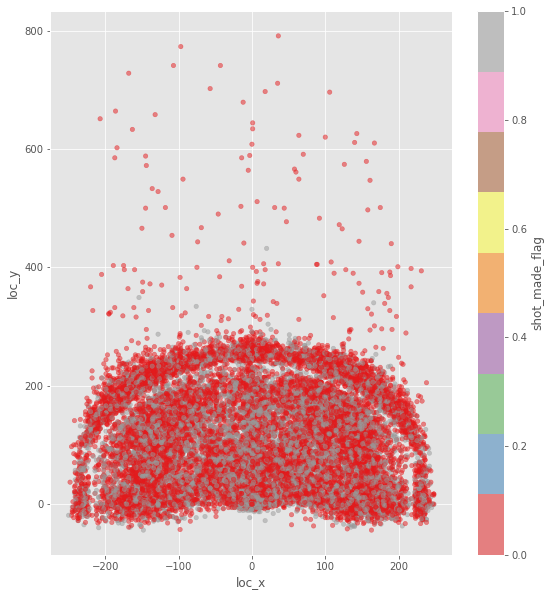

In [35]:
plt.figure(figsize=(9,10))
kobi.plot(x="loc_x", y="loc_y", c="shot_made_flag", cmap=cm.Set1, kind="scatter", ax=plt.gca(), alpha=0.5 )

In [68]:
#accuaracy
kmeans.predict(X_test)
accuracy_score(kmeans.predict(X_test), Y_test)

0.5153696498054474

In [63]:
y=pd.DataFrame(Y)
y=list(y["shot_made_flag"])
y

[0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0

In [71]:
type(y[0])

float

In [72]:
#para hacerlo int
y=kobi["shot_made_flag"].apply(lambda x: int(x))

In [39]:
# con SVM
modelo=svm.SVC(C = 0.1, kernel="rbf", probability=True)
modelo.fit(X_train,Y_train)
y_predic=modelo.predict(X_test)

print("accuracy: "," ", accuracy_score(y_predic, Y_test))
print("F1score: "," ", f1_score(y_predic,Y_test))

accuracy:    0.5461089494163424
F1score:    0.0


In [46]:
kobi.shot_made_flag

1        0.0
2        1.0
3        0.0
4        1.0
5        0.0
        ... 
30691    0.0
30692    0.0
30694    1.0
30695    0.0
30696    0.0
Name: shot_made_flag, Length: 25697, dtype: float64

In [74]:
yy=kmeans.predict(X)

Text(0.5, 1.0, 'action_type vs combined_shot_type')

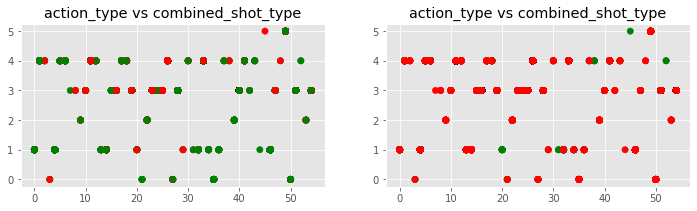

In [75]:
plt.figure(figsize=(12,3))
# arreglo de tres colores
colors = np.array(['red', 'green', 'blue'])
plt.subplot(1, 2, 1)
plt.scatter(X['action_type'], X['combined_shot_type'], c=colors[y], s=40)
plt.title('action_type vs combined_shot_type')
plt.subplot(1,2,2)
plt.scatter(X['action_type'], X['combined_shot_type'], c= colors[yy], s=40)
plt.title('action_type vs combined_shot_type')